# ASSIGNMENT 8

# Try out different clustering models in the given dataset. Find the optimum 
## number of clusters in each model and create the model with optimum number of 
## clusters.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [52]:
df = pd.read_csv('Wine_clust.csv') #Reading the dataset into dataframe df

In [53]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [54]:
df.shape

(178, 13)

In [55]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [56]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [57]:
feature_set=df.iloc[:,3:5].values
feature_set

array([[ 15.6, 127. ],
       [ 11.2, 100. ],
       [ 18.6, 101. ],
       [ 16.8, 113. ],
       [ 21. , 118. ],
       [ 15.2, 112. ],
       [ 14.6,  96. ],
       [ 17.6, 121. ],
       [ 14. ,  97. ],
       [ 16. ,  98. ],
       [ 18. , 105. ],
       [ 16.8,  95. ],
       [ 16. ,  89. ],
       [ 11.4,  91. ],
       [ 12. , 102. ],
       [ 17.2, 112. ],
       [ 20. , 120. ],
       [ 20. , 115. ],
       [ 16.5, 108. ],
       [ 15.2, 116. ],
       [ 16. , 126. ],
       [ 18.6, 102. ],
       [ 16.6, 101. ],
       [ 17.8,  95. ],
       [ 20. ,  96. ],
       [ 25. , 124. ],
       [ 16.1,  93. ],
       [ 17. ,  94. ],
       [ 19.4, 107. ],
       [ 16. ,  96. ],
       [ 22.5, 101. ],
       [ 19.1, 106. ],
       [ 17.2, 104. ],
       [ 19.5, 132. ],
       [ 19. , 110. ],
       [ 20.5, 100. ],
       [ 15.5, 110. ],
       [ 18. ,  98. ],
       [ 15.5,  98. ],
       [ 13.2, 128. ],
       [ 16.2, 117. ],
       [ 18.8,  90. ],
       [ 15. , 101. ],
       [ 17

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.loc[:,:] = sc.fit_transform(df) # since we have a wide range of data we go for scaling

In [59]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [60]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
    km.fit(feature_set)
    wcss.append(km.inertia_) # Here we will first find out the k value without doing PCA by taking a random columns

C:\Users\Silpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


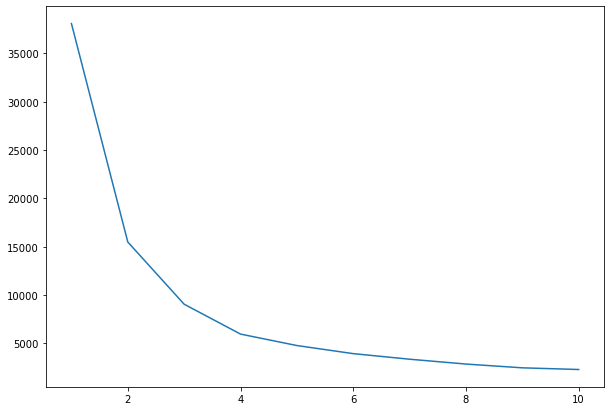

In [61]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.show()

In [62]:
## So the best k value is 4

In [63]:
km=KMeans(n_clusters=4,init='k-means++',n_init=10,random_state=101)
km.fit(feature_set)

KMeans(n_clusters=4, random_state=101)

In [64]:
df['km_4']=km.labels_
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_4
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


In [65]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_4
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.138472
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.006120
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.177203
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.004459
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.483556
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.097102
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.108445
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.107995
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.035817
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.171794


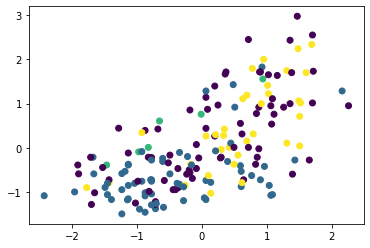

In [66]:
plt.scatter(x=df["Alcohol"],y=df["Proline"],c=df["km_4"])
plt.show()

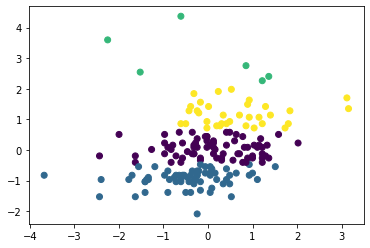

In [67]:
plt.scatter(x=df["Ash"],y=df["Magnesium"],c=df["km_4"])
plt.show()

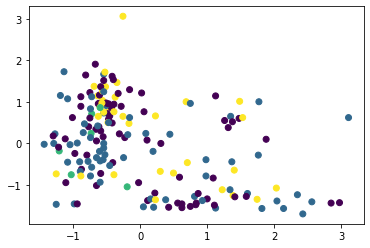

In [68]:
plt.scatter(x=df["Malic_Acid"],y=df["Flavanoids"],c=df["km_4"])
plt.show()

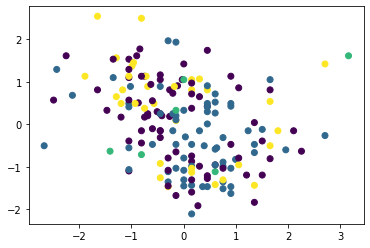

In [69]:
plt.scatter(x=df["Ash_Alcanity"],y=df["Total_Phenols"],c=df["km_4"])
plt.show()

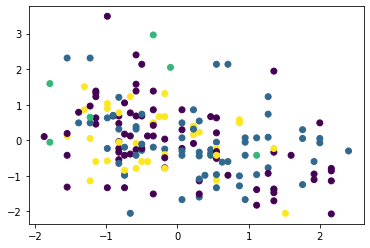

In [70]:
plt.scatter(x=df["Nonflavanoid_Phenols"],y=df["Proanthocyanins"],c=df["km_4"])
plt.show()

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [72]:
mergings = linkage(df, method = "complete")

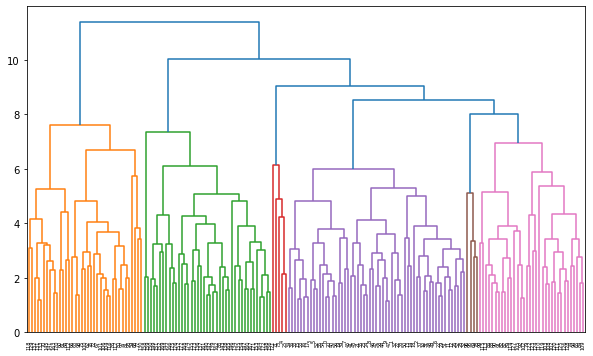

In [73]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = df.index)   ### inter cluster distance matrix
plt.show()

# Now let's see how PCA can be used in k means clustering and Agglomerative Hierarchical Clustering

In [74]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2) # Since the no of columns is more we need to transform it to two columns. Hence used Principal Component Analysis

In [75]:
pc_arr = pc.fit_transform(df)
pc_arr.shape

(178, 2)

In [76]:
trans_data = pd.DataFrame(pc_arr, columns = ["PC1","PC2"])

In [77]:
trans_data

,PC1,PC2
0,-3.468286,-1.932102
1,-2.126991,0.777200
2,-2.454560,-0.554772
3,-3.916478,-3.069272
4,-1.162244,-1.528989
...,...,...
173,3.406210,-1.828783
174,2.639318,-1.439043
175,2.495513,-3.366721
176,2.210849,-2.929989


In [78]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(trans_data, method = "complete")

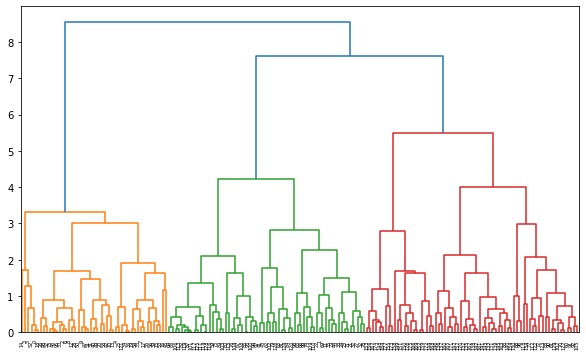

In [79]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = df.index)
plt.show()

In [80]:
wcss1=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
    km.fit(trans_data)
    wcss1.append(km.inertia_)

C:\Users\Silpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


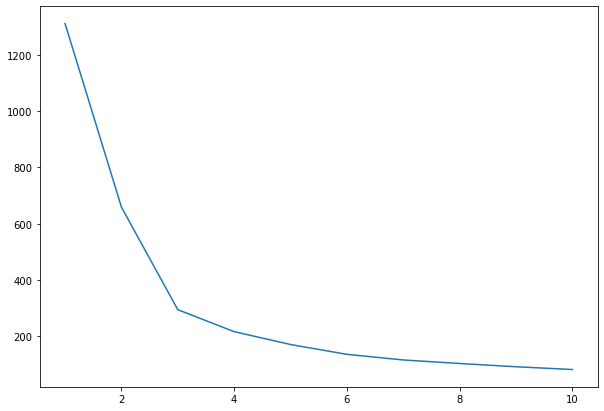

In [81]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss1)
plt.show()

In [82]:
# we got k value as 4

In [83]:
km=KMeans(n_clusters=4,init='k-means++',n_init=10,random_state=101)
km.fit(trans_data)

KMeans(n_clusters=4, random_state=101)

In [84]:
df['kmpca_4']=km.labels_
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_4,kmpca_4
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3,1


In [85]:
trans_data['kmpca_4']=km.labels_
trans_data

,PC1,PC2,kmpca_4
0,-3.468286,-1.932102,2
1,-2.126991,0.777200,0
2,-2.454560,-0.554772,2
3,-3.916478,-3.069272,2
4,-1.162244,-1.528989,2
...,...,...,...
173,3.406210,-1.828783,1
174,2.639318,-1.439043,1
175,2.495513,-3.366721,1
176,2.210849,-2.929989,1


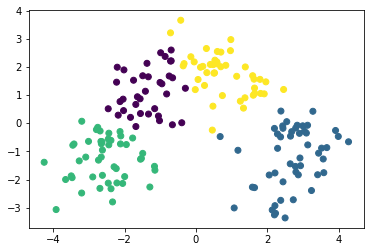

In [86]:
plt.scatter(x=trans_data["PC1"],y=trans_data["PC2"],c=trans_data["kmpca_4"])
plt.show()

In [87]:
## The above shows the k means cluster after Principal Component Analysis

# DB Scan 

In [88]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

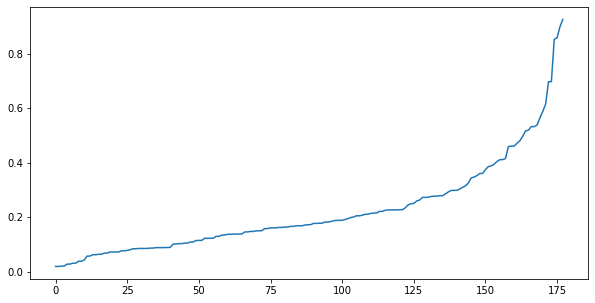

In [89]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(trans_data)
distances, idx = nn.kneighbors(trans_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [91]:
db = DBSCAN(eps=0.4, min_samples=6).fit(trans_data)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 107
